# Anomaly Detection

This notebook shows some basic usage of CapyMOA for Anomaly Detection tasks.

Algorithms: `HalfSpaceTrees`, `Autoencoder` and `Online Isolation Forest`

---

*More information about CapyMOA can be found in* https://www.capymoa.org

**last update on 29/07/2024**

## 1. Unsupervised Anomaly Detection for data streams

* Recent research has been focused on unsupervised anomaly detection for data streams, as it is often difficult to obtain labeled data for training.
* Instead of using evaluation functions, we first use a basic **test-then-train loop** from scratch to evaluate the model's performance.
* Please notice that lower scores indicate higher anomaly likelihood.

In [1]:
from capymoa.datasets import ElectricityTiny
from capymoa.anomaly import HalfSpaceTrees
from capymoa.evaluation import AnomalyDetectionEvaluator
stream = ElectricityTiny()
schema = stream.get_schema()
learner = HalfSpaceTrees(schema)
evaluator = AnomalyDetectionEvaluator(schema)
while stream.has_more_instances():
    instance = stream.next_instance()
    score = learner.score_instance(instance)
    evaluator.update(instance.y_index, score)
    learner.train(instance)
    
auc = evaluator.auc()
print(f"AUC: {auc:.2f}")

AUC: 0.54


## 2. High-level evaluation functions

* CapyMOA provides `prequential_evaluation_anomaly` as a high level function to assess Anomaly Detectors


### 2.1 ```prequential_evaluation_anomaly```
In this example, we use the ```prequential_evaluation_anomaly``` function with ```plot_windowed_results``` to plot AUC for HalfSpaceTrees on Electricity

AUC: 0.42903916235645884


,instances,auc,s_auc,Accuracy,Kappa,Periodical holdout AUC,Pos/Neg ratio,G-Mean,Recall,KappaM
0,4500.0,0.424887,0.101194,0.499333,-0.057376,0.000000,1.542373,0.453178,0.601832,-0.275764
1,9000.0,0.487969,0.121366,0.506222,-0.006369,0.424887,1.176015,0.483169,0.612664,-0.159103
2,13500.0,0.468598,0.124515,0.497333,-0.015334,0.487969,1.085264,0.477359,0.613151,-0.133267
3,18000.0,0.411306,0.105785,0.483556,-0.072973,0.468598,1.384738,0.447720,0.585534,-0.180444
4,22500.0,0.398220,0.092782,0.486000,-0.099953,0.411306,1.552467,0.421006,0.612715,-0.199938
5,27000.0,0.356802,0.081525,0.474444,-0.119603,0.398220,1.406417,0.398894,0.633080,-0.233055
6,31500.0,0.430827,0.104884,0.541556,0.007289,0.356802,1.567028,0.473213,0.675646,-0.088983
7,36000.0,0.402884,0.095072,0.518000,-0.029875,0.430827,1.501390,0.457435,0.647908,-0.152191
8,40500.0,0.442440,0.100413,0.529333,0.008480,0.402884,1.306509,0.466961,0.693998,-0.120569
9,45000.0,0.428407,0.100096,0.479778,-0.069896,0.442440,1.190847,0.437049,0.626738,-0.217052


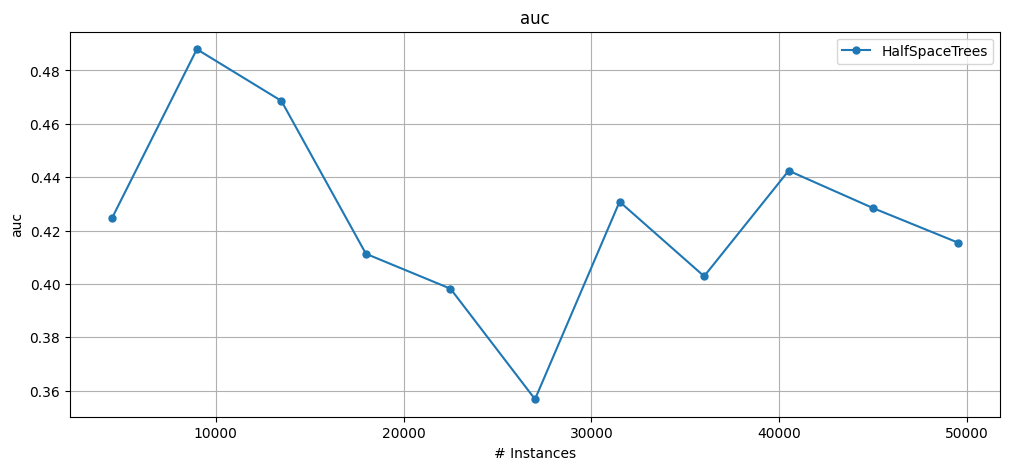

In [8]:
from capymoa.evaluation.visualization import plot_windowed_results
from capymoa.datasets import Electricity
from capymoa.anomaly import HalfSpaceTrees
from capymoa.evaluation import prequential_evaluation_anomaly

stream = Electricity()
hst = HalfSpaceTrees(schema=stream.get_schema())


results_hst = prequential_evaluation_anomaly(stream=stream, learner=hst, window_size=4500)

print(f"AUC: {results_hst.auc()}")
display(results_hst.windowed.metrics_per_window())
plot_windowed_results(results_hst, metric="auc")

## 2.2 Autoencoder

AUC: 0.5230563943495156


,instances,auc,s_auc,Accuracy,Kappa,Periodical holdout AUC,Pos/Neg ratio,G-Mean,Recall,KappaM
0,4500.0,0.544910,0.222925,0.504889,0.044039,0.000000,1.542373,0.516265,0.434799,-0.261608
1,9000.0,0.513216,0.198620,0.489778,-0.011067,0.544910,1.176015,0.491096,0.437500,-0.197705
2,13500.0,0.504520,0.206141,0.503111,0.012575,0.513216,1.085264,0.500149,0.427412,-0.120240
3,18000.0,0.516622,0.219586,0.516222,0.054810,0.504520,1.384738,0.523022,0.450823,-0.105778
4,22500.0,0.556117,0.240853,0.516667,0.058864,0.516622,1.552467,0.527151,0.462185,-0.128346
5,27000.0,0.598999,0.274222,0.553778,0.132179,0.556117,1.406417,0.561848,0.474144,-0.046924
6,31500.0,0.484991,0.201277,0.483556,-0.007277,0.598999,1.567028,0.492828,0.439388,-0.226755
7,36000.0,0.480584,0.208603,0.488667,0.007570,0.484991,1.501390,0.498176,0.427249,-0.222311
8,40500.0,0.467688,0.197652,0.490000,0.000195,0.480584,1.306509,0.494291,0.424088,-0.214214
9,45000.0,0.554163,0.239936,0.516889,0.043774,0.467688,1.190847,0.518599,0.460343,-0.130231


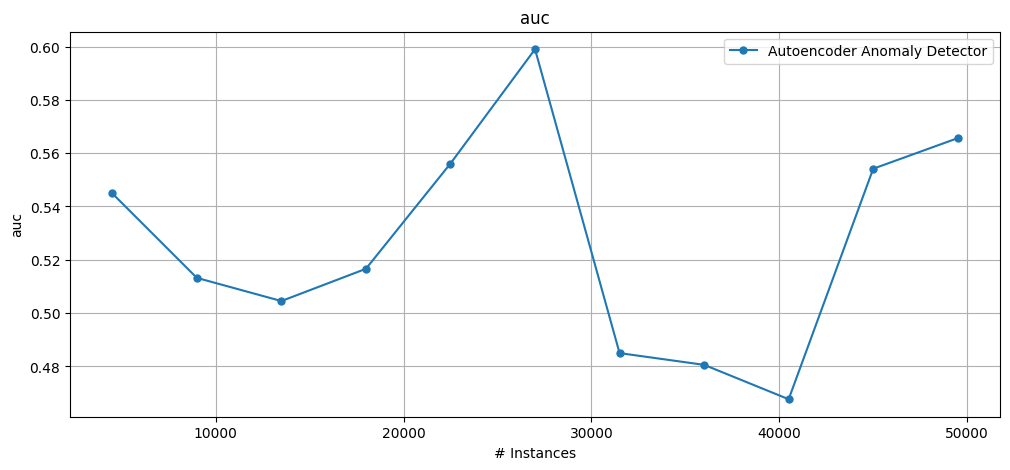

In [9]:
from capymoa.evaluation.visualization import plot_windowed_results
from capymoa.datasets import Electricity
from capymoa.anomaly import Autoencoder
from capymoa.evaluation import prequential_evaluation_anomaly

stream = Electricity()
ae = Autoencoder(schema=stream.get_schema())

results_ae = prequential_evaluation_anomaly(stream=stream, learner=ae, window_size=4500)

print(f"AUC: {results_ae.auc()}")
display(results_ae.windowed.metrics_per_window())
plot_windowed_results(results_ae, metric="auc")

## 2.3 Online Isolation Forest

AUC: 0.520108250564401


,instances,auc,s_auc,Accuracy,Kappa,Periodical holdout AUC,Pos/Neg ratio,G-Mean,Recall,KappaM
0,4500.0,0.516486,0.019243,0.606000,0.002273,0.000000,1.542373,0.091753,0.993407,-0.003964
1,9000.0,0.473500,-0.007678,0.540444,0.000000,0.516486,1.176015,0.000000,1.000000,-0.078769
2,13500.0,0.485192,-0.008112,0.520444,0.000000,0.473500,1.085264,0.000000,1.000000,-0.081162
3,18000.0,0.508877,0.015705,0.566667,-0.014223,0.485192,1.384738,0.198973,0.945656,0.009524
4,22500.0,0.465127,0.022282,0.609778,0.011374,0.508877,1.552467,0.138185,0.990135,0.089023
5,27000.0,0.514274,0.034964,0.597778,0.037475,0.465127,1.406417,0.180577,0.999620,0.056309
6,31500.0,0.634469,0.046907,0.618222,0.024269,0.514274,1.567028,0.141300,1.000000,0.093130
7,36000.0,0.613453,0.050725,0.614889,0.049397,0.634469,1.501390,0.226227,0.990004,0.079416
8,40500.0,0.555540,0.031629,0.568000,0.005282,0.613453,1.306509,0.090399,0.996469,-0.028511
9,45000.0,0.622690,0.033355,0.543556,0.000170,0.555540,1.190847,0.031192,0.999182,-0.067845


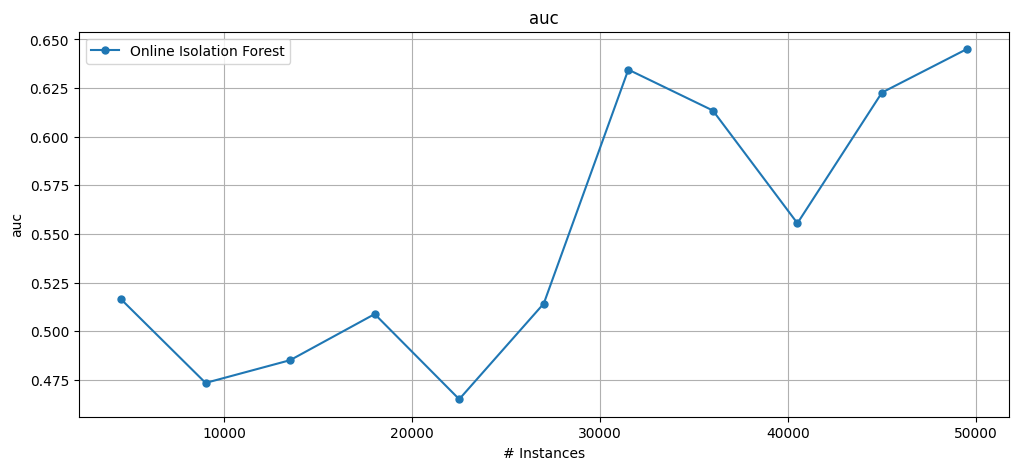

In [10]:
from capymoa.evaluation.visualization import plot_windowed_results
from capymoa.datasets import Electricity
from capymoa.anomaly import OnlineIsolationForest
from capymoa.evaluation import prequential_evaluation_anomaly

stream = Electricity()
oif = OnlineIsolationForest(schema=stream.get_schema(), num_trees=10)

results_oif = prequential_evaluation_anomaly(stream=stream, learner=oif, window_size=4500)

print(f"AUC: {results_oif.auc()}")
display(results_oif.windowed.metrics_per_window())
plot_windowed_results(results_oif, metric="auc")

## 2.3.1 Comparing algorithms

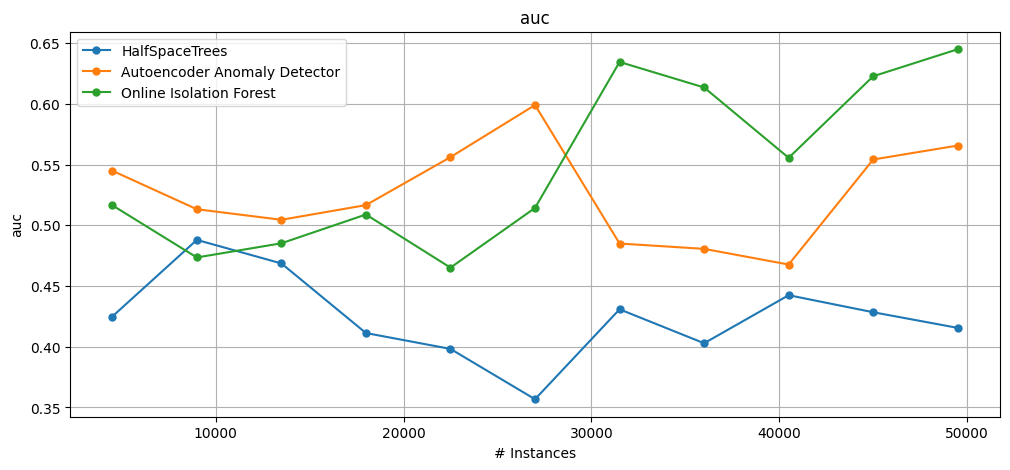

In [11]:
plot_windowed_results(results_hst, results_ae, results_oif, metric="auc")